In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problem Statement 9 and 10

Extract Sample document and apply following document preprocessing methods: Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization. Create  representation of document by calculating Term Frequency and Inverse Document  Frequency. 

In [ ]:
import pandas as pd

In [183]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
stopword = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# convert text to lower case
text = "A boy and a girl were playing together. The boy had a collection of marbles. The girl has some sweets with her. The boy told the girl that he would give her all his marbles in exchange for the sweets with her. The girl agreed.The boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. The girl gave him all her sweets as she promised. That night the girl slept peacefully. But the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her."
text = text.lower()
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'a boy and a girl were playing together. the boy had a collection of marbles. the girl has some sweets with her. the boy told the girl that he would give her all his marbles in exchange for the sweets with her. the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles. the girl gave him all her sweets as she promised. that night the girl slept peacefully. but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.'

# Tokenization

In [184]:
word_tokens = nltk.word_tokenize(text)
sentence_token = nltk.sent_tokenize(text)
print(word_tokens)
print ()
sentence_token

['a', 'boy', 'and', 'a', 'girl', 'were', 'playing', 'together', '.', 'the', 'boy', 'had', 'a', 'collection', 'of', 'marbles', '.', 'the', 'girl', 'has', 'some', 'sweets', 'with', 'her', '.', 'the', 'boy', 'told', 'the', 'girl', 'that', 'he', 'would', 'give', 'her', 'all', 'his', 'marbles', 'in', 'exchange', 'for', 'the', 'sweets', 'with', 'her', '.', 'the', 'girl', 'agreed.the', 'boy', 'kept', 'the', 'most', 'beautiful', 'and', 'the', 'biggest', 'marbles', 'with', 'him', 'and', 'gave', 'her', 'the', 'remaining', 'marbles', '.', 'the', 'girl', 'gave', 'him', 'all', 'her', 'sweets', 'as', 'she', 'promised', '.', 'that', 'night', 'the', 'girl', 'slept', 'peacefully', '.', 'but', 'the', 'boy', 'could', 'not', 'sleep', 'as', 'he', 'kept', 'wondering', 'if', 'the', 'girl', 'has', 'hidden', 'some', 'sweets', 'from', 'him', 'the', 'way', 'he', 'had', 'hidden', 'the', 'best', 'marbles', 'from', 'her', '.']



['a boy and a girl were playing together.',
 'the boy had a collection of marbles.',
 'the girl has some sweets with her.',
 'the boy told the girl that he would give her all his marbles in exchange for the sweets with her.',
 'the girl agreed.the boy kept the most beautiful and the biggest marbles with him and gave her the remaining marbles.',
 'the girl gave him all her sweets as she promised.',
 'that night the girl slept peacefully.',
 'but the boy could not sleep as he kept wondering if the girl has hidden some sweets from him the way he had hidden the best marbles from her.']

# Stopword Removal

In [185]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [186]:
removing_stopwords = [word for word in word_tokens if word not in stopword]
print(removing_stopwords)

['boy', 'girl', 'playing', 'together', '.', 'boy', 'collection', 'marbles', '.', 'girl', 'sweets', '.', 'boy', 'told', 'girl', 'would', 'give', 'marbles', 'exchange', 'sweets', '.', 'girl', 'agreed.the', 'boy', 'kept', 'beautiful', 'biggest', 'marbles', 'gave', 'remaining', 'marbles', '.', 'girl', 'gave', 'sweets', 'promised', '.', 'night', 'girl', 'slept', 'peacefully', '.', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweets', 'way', 'hidden', 'best', 'marbles', '.']


In [187]:
words_without_punctuation = []
for word in lemmatized_word:
  if word.isalpha():
    words_without_punctuation.append(word)
print(words_without_punctuation)

['boy', 'girl', 'playing', 'together', 'boy', 'collection', 'marble', 'girl', 'sweet', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', 'girl', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', 'girl', 'gave', 'sweet', 'promised', 'night', 'girl', 'slept', 'peacefully', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble']


# Stemming and Lemmatization

In [188]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in removing_stopwords]
print(lemmatized_word)

['boy', 'girl', 'playing', 'together', '.', 'boy', 'collection', 'marble', '.', 'girl', 'sweet', '.', 'boy', 'told', 'girl', 'would', 'give', 'marble', 'exchange', 'sweet', '.', 'girl', 'agreed.the', 'boy', 'kept', 'beautiful', 'biggest', 'marble', 'gave', 'remaining', 'marble', '.', 'girl', 'gave', 'sweet', 'promised', '.', 'night', 'girl', 'slept', 'peacefully', '.', 'boy', 'could', 'sleep', 'kept', 'wondering', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marble', '.']


In the lemmatized sentence you provided, some words have been lemmatized. For example, the word “marbles” has been lemmatized to “marble” and the word “sweets” has been lemmatized to “sweet”.

Lemmatization reduces words to their base or root form, but not all words have a different base form. For example, the word “boy” is already in its base form, so it will not change when lemmatized. Similarly, the word “playing” is the present participle of the verb “play”, but since the WordNetLemmatizer defaults to using the part of speech tag for nouns when no tag is provided, it will not be lemmatized to “play”.

In summary, some words in your sentence have been lemmatized, while others have not because they are already in their base form or because the part of speech tag was not specified.

In [189]:
snowball_stemmer = SnowballStemmer('english')
stemmed_word = [snowball_stemmer.stem(word) for word in lemmatized_word]
print(stemmed_word)

['boy', 'girl', 'play', 'togeth', '.', 'boy', 'collect', 'marbl', '.', 'girl', 'sweet', '.', 'boy', 'told', 'girl', 'would', 'give', 'marbl', 'exchang', 'sweet', '.', 'girl', 'agreed.th', 'boy', 'kept', 'beauti', 'biggest', 'marbl', 'gave', 'remain', 'marbl', '.', 'girl', 'gave', 'sweet', 'promis', '.', 'night', 'girl', 'slept', 'peac', '.', 'boy', 'could', 'sleep', 'kept', 'wonder', 'girl', 'hidden', 'sweet', 'way', 'hidden', 'best', 'marbl', '.']


# POS Tagging

In [190]:
pos_tag = nltk.pos_tag(words_without_punctuation)
print(pos_tag)

[('boy', 'NN'), ('girl', 'NN'), ('playing', 'VBG'), ('together', 'RB'), ('boy', 'JJ'), ('collection', 'NN'), ('marble', 'JJ'), ('girl', 'JJ'), ('sweet', 'NN'), ('boy', 'NN'), ('told', 'VBD'), ('girl', 'NN'), ('would', 'MD'), ('give', 'VB'), ('marble', 'JJ'), ('exchange', 'NN'), ('sweet', 'JJ'), ('girl', 'NN'), ('boy', 'NN'), ('kept', 'VBD'), ('beautiful', 'JJ'), ('biggest', 'JJS'), ('marble', 'JJ'), ('gave', 'VBD'), ('remaining', 'VBG'), ('marble', 'JJ'), ('girl', 'NNS'), ('gave', 'VBD'), ('sweet', 'NN'), ('promised', 'JJ'), ('night', 'NN'), ('girl', 'NN'), ('slept', 'VBD'), ('peacefully', 'RB'), ('boy', 'VBN'), ('could', 'MD'), ('sleep', 'VB'), ('kept', 'VBD'), ('wondering', 'VBG'), ('girl', 'JJ'), ('hidden', 'JJ'), ('sweet', 'JJ'), ('way', 'NN'), ('hidden', 'JJ'), ('best', 'RBS'), ('marble', 'JJ')]


# Representation

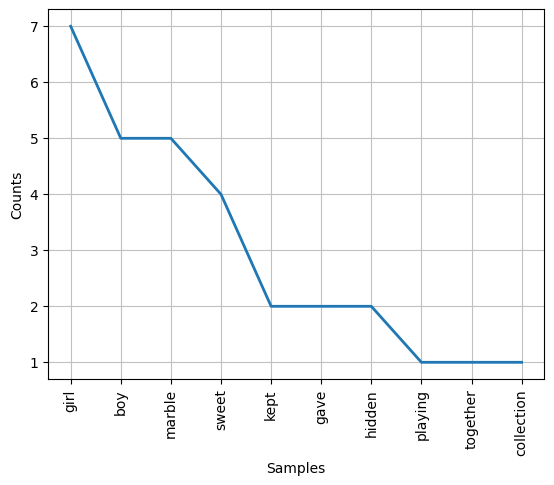

<Axes: xlabel='Samples', ylabel='Counts'>

In [191]:
freq = FreqDist(words_without_punctuation)
freq.plot(10)

# Term Frequency-Inverse Document Frequency

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = sentence_token

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and their TF-IDF values for each document
for doc_index, doc in enumerate(corpus):
    print()
    print(f"Document {doc_index}: {doc}")
    for feature_index, feature_name in enumerate(feature_names):
        tfidf_value = tfidf_matrix[doc_index, feature_index]
        if tfidf_value > 0:
            print(f"  {feature_name}: {tfidf_value}")


Document 0: a boy and a girl were playing together.
  and: 0.40813158848235204
  boy: 0.27333048139766297
  girl: 0.217382967013214
  playing: 0.48698518118259204
  together: 0.48698518118259204
  were: 0.48698518118259204

Document 1: the boy had a collection of marbles.
  boy: 0.29504957196591153
  collection: 0.5256814700173216
  had: 0.44056209856920525
  marbles: 0.333324372942383
  of: 0.5256814700173216
  the: 0.2346564168107343

Document 2: the girl has some sweets with her.
  girl: 0.25587811588090575
  has: 0.4804053570857617
  her: 0.3217330665497982
  some: 0.4804053570857617
  sweets: 0.3634693382132125
  the: 0.25587811588090575
  with: 0.4145504064168692

Document 3: the boy told the girl that he would give her all his marbles in exchange for the sweets with her.
  all: 0.22397002952533965
  boy: 0.1499953390435913
  exchange: 0.2672424494596166
  for: 0.2672424494596166
  girl: 0.11929306849611998
  give: 0.2672424494596166
  he: 0.22397002952533965
  her: 0.2999906780